In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df_train_part = pd.read_csv('data/customer_conversion_traing_dataset .csv')
df_test_part = pd.read_csv('data/customer_conversion_testing_dataset.csv')

df = pd.concat([df_train_part,df_test_part])
df.reset_index(drop=True, inplace=True)

In [3]:
df.head().T

,0,1,2,3,4
LeadID,1,2,3,4,5
Age,60,27,21,37,35
Gender,Female,Female,Female,Female,Male
Location,Faisalabad,Islamabad,Rawalpindi,Faisalabad,Karachi
LeadSource,Referral,Referral,Referral,Email,Referral
TimeSpent (minutes),30,28,45,45,31
PagesViewed,13,4,10,15,11
LeadStatus,Warm,Hot,Warm,Warm,Cold
EmailSent,1,7,9,5,2
DeviceType,Desktop,Desktop,Tablet,Desktop,Tablet


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126145 entries, 0 to 126144
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LeadID                 126145 non-null  int64  
 1   Age                    126145 non-null  int64  
 2   Gender                 126145 non-null  object 
 3   Location               126145 non-null  object 
 4   LeadSource             126145 non-null  object 
 5   TimeSpent (minutes)    126145 non-null  int64  
 6   PagesViewed            126145 non-null  int64  
 7   LeadStatus             126145 non-null  object 
 8   EmailSent              126145 non-null  int64  
 9   DeviceType             126145 non-null  object 
 10  ReferralSource         126145 non-null  object 
 11  FormSubmissions        126145 non-null  int64  
 12  Downloads              126145 non-null  int64  
 13  CTR_ProductPage        126145 non-null  float64
 14  ResponseTime (hours)   126145 non-nu

In [5]:
df.isnull().sum()

LeadID                   0
Age                      0
Gender                   0
Location                 0
LeadSource               0
TimeSpent (minutes)      0
PagesViewed              0
LeadStatus               0
EmailSent                0
DeviceType               0
ReferralSource           0
FormSubmissions          0
Downloads                0
CTR_ProductPage          0
ResponseTime (hours)     0
FollowUpEmails           0
SocialMediaEngagement    0
PaymentHistory           0
Conversion (Target)      0
dtype: int64

In [6]:
categorical = ['Gender','Location','LeadSource','LeadStatus','DeviceType','ReferralSource','PaymentHistory']
numerical = ['Age', 'TimeSpent (minutes)','PagesViewed','EmailSent','FormSubmissions',
             'Downloads','CTR_ProductPage','ResponseTime (hours)','FollowUpEmails','SocialMediaEngagement']      

In [7]:
df[numerical].describe()

,Age,TimeSpent (minutes),PagesViewed,EmailSent,FormSubmissions,Downloads,CTR_ProductPage,ResponseTime (hours),FollowUpEmails,SocialMediaEngagement
count,126145.000000,126145.000000,126145.000000,126145.000000,126145.000000,126145.000000,126145.000000,126145.000000,126145.000000,126145.000000
mean,39.985469,32.507741,8.499084,4.992786,2.501621,1.498347,0.449220,12.515454,4.991343,110.008252
std,11.852607,16.160227,4.028861,3.169346,1.709068,1.118019,0.206202,6.932374,3.163592,52.237312
min,20.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.100000,1.000000,0.000000,20.000000
25%,30.000000,18.000000,5.000000,2.000000,1.000000,0.000000,0.300000,7.000000,2.000000,65.000000
50%,40.000000,33.000000,8.000000,5.000000,3.000000,2.000000,0.400000,13.000000,5.000000,110.000000
75%,50.000000,47.000000,12.000000,8.000000,4.000000,2.000000,0.600000,19.000000,8.000000,155.000000
max,60.000000,60.000000,15.000000,10.000000,5.000000,3.000000,0.800000,24.000000,10.000000,200.000000


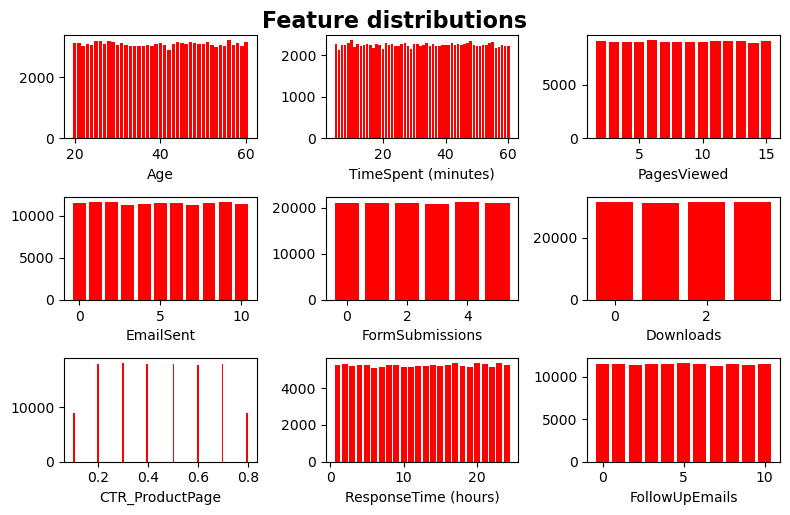

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(8,5))
for col, ax in zip(df[numerical].columns, axs.ravel()):
    if df[numerical][col].dtype == float:
        ax.hist(df[numerical][col], bins=100, color='red')
    else: #int
        vc = df[numerical][col].value_counts()
        ax.bar(vc.index, vc, color='red')
    ax.set_xlabel(col)
plt.tight_layout()
plt.suptitle('Feature distributions', y=1.02, fontsize=16, fontweight = "bold")
plt.show()

In [14]:
df[categorical].nunique()

Gender             2
Location          10
LeadSource         4
LeadStatus         3
DeviceType         3
ReferralSource     5
PaymentHistory     2
dtype: int64

In [15]:
from IPython.display import display

In [16]:
global_mean = df['Conversion (Target)'].mean()
global_mean

0.016330413413135677

In [17]:
for col in categorical:
    df_group = df.groupby(by=col)['Conversion (Target)'].agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
Gender,,,
Female,0.015821,-0.000509,0.96882
Male,0.016841,0.000510,1.03125


,mean,diff,risk
Location,,,
Faisalabad,0.000000,-0.016330,0.000000
Gujranwala,0.000000,-0.016330,0.000000
Islamabad,0.053922,0.037591,3.301911
Karachi,0.054658,0.038328,3.347024
Lahore,0.054162,0.037832,3.316640
Multan,0.000000,-0.016330,0.000000
Peshawar,0.000000,-0.016330,0.000000
Quetta,0.000000,-0.016330,0.000000
Rawalpindi,0.000000,-0.016330,0.000000


,mean,diff,risk
LeadSource,,,
Email,0.017188,0.000858,1.052530
Organic,0.017109,0.000778,1.047648
Referral,0.015384,-0.000947,0.942023
Social Media,0.015630,-0.000700,0.957106


,mean,diff,risk
LeadStatus,,,
Cold,0.010220,-0.006110,0.625832
Hot,0.028961,0.012630,1.773421
Warm,0.009806,-0.006524,0.600490


,mean,diff,risk
DeviceType,,,
Desktop,0.017043,0.000712,1.043620
Mobile,0.015305,-0.001025,0.937204
Tablet,0.016659,0.000329,1.020127


,mean,diff,risk
ReferralSource,,,
Direct,0.015612,-0.000718,0.956008
Facebook,0.016123,-0.000207,0.987317
Google,0.016746,0.000415,1.025421
ReferralSite,0.016472,0.000142,1.008681
Twitter,0.016701,0.000371,1.022691


,mean,diff,risk
PaymentHistory,,,
Good,0.015808,-0.000523,0.968004
No Payment,0.016854,0.000524,1.032058


In [18]:
from sklearn.metrics import mutual_info_score

In [19]:
def calculate_mi(series):
    return mutual_info_score(series, df['Conversion (Target)'])

df_mi = df[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi)

,MI
Location,0.019922
LeadStatus,0.002309
LeadSource,0.000021
DeviceType,0.000018
PaymentHistory,0.000009
Gender,0.000008
ReferralSource,0.000006


In [20]:
df.corr()

,LeadID,Age,TimeSpent (minutes),PagesViewed,EmailSent,FormSubmissions,Downloads,CTR_ProductPage,ResponseTime (hours),FollowUpEmails,SocialMediaEngagement,Conversion (Target)
LeadID,1.000000,-0.000832,-0.003668,-0.001181,0.006390,-0.001460,0.003491,0.006047,-0.002441,-0.003176,-0.000058,-0.000211
Age,-0.000832,1.000000,-0.000617,0.004167,-0.000619,0.002805,0.005038,-0.000983,-0.003739,-0.000411,0.001539,-0.034354
TimeSpent (minutes),-0.003668,-0.000617,1.000000,-0.001712,-0.001126,-0.003405,-0.002465,-0.000258,-0.002745,-0.003585,-0.001822,0.040663
PagesViewed,-0.001181,0.004167,-0.001712,1.000000,-0.002140,-0.000345,-0.001217,-0.000238,-0.000623,-0.001931,0.001326,0.161177
EmailSent,0.006390,-0.000619,-0.001126,-0.002140,1.000000,0.001707,-0.004420,0.005264,-0.002752,0.003012,-0.005056,0.065399
FormSubmissions,-0.001460,0.002805,-0.003405,-0.000345,0.001707,1.000000,0.004597,0.001645,0.003340,-0.005037,0.001017,0.001451
Downloads,0.003491,0.005038,-0.002465,-0.001217,-0.004420,0.004597,1.000000,-0.002233,-0.001267,-0.000504,0.000931,-0.000201
CTR_ProductPage,0.006047,-0.000983,-0.000258,-0.000238,0.005264,0.001645,-0.002233,1.000000,-0.001432,-0.001162,-0.003040,0.001883
ResponseTime (hours),-0.002441,-0.003739,-0.002745,-0.000623,-0.002752,0.003340,-0.001267,-0.001432,1.000000,0.000498,-0.000777,-0.002958
FollowUpEmails,-0.003176,-0.000411,-0.003585,-0.001931,0.003012,-0.005037,-0.000504,-0.001162,0.000498,1.000000,-0.000265,0.043651


Text(0.5, 1.0, 'Full traind dataset correlation matrix')

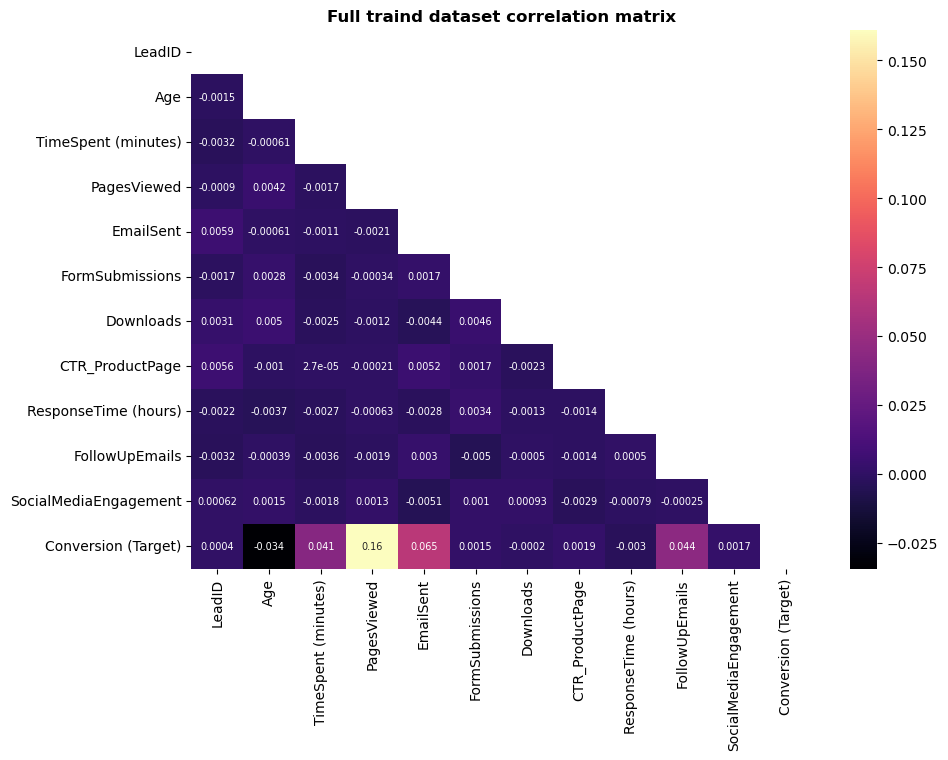

In [56]:
corr = df.corr(method = "spearman")
plt.figure(figsize = (10, 7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap = "magma", annot = True, annot_kws = {'size': 7})
plt.title("Full traind dataset correlation matrix", fontsize = 12, fontweight = "bold")

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)
y_train = df_train['Conversion (Target)']
y_val = df_val['Conversion (Target)']
y_test = df_test['Conversion (Target)']
del df_train['Conversion (Target)']
del df_val['Conversion (Target)']
del df_test['Conversion (Target)']

train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')
test_dict = df_test.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)
X_val = dv.transform(val_dict)

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]
conv = y_pred > 0.5
(y_val == conv).mean()

0.9842641404732649

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

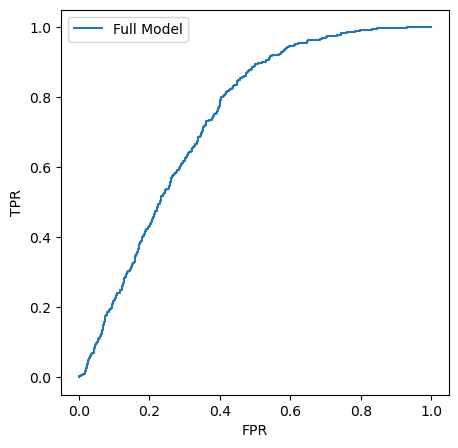

In [57]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr,label='Full Model')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [32]:
roc_auc_score(y_val, y_pred)

0.7356339386571972

In [38]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'Age': -0.089,
 'CTR_ProductPage': -0.007,
 'DeviceType=Desktop': -0.006,
 'DeviceType=Mobile': -0.007,
 'DeviceType=Tablet': -0.004,
 'Downloads': -0.023,
 'EmailSent': 0.033,
 'FollowUpEmails': 0.001,
 'FormSubmissions': -0.031,
 'Gender=Female': -0.01,
 'Gender=Male': -0.007,
 'LeadID': -0.0,
 'LeadSource=Email': -0.004,
 'LeadSource=Organic': -0.003,
 'LeadSource=Referral': -0.006,
 'LeadSource=Social Media': -0.004,
 'LeadStatus=Cold': -0.015,
 'LeadStatus=Hot': 0.014,
 'LeadStatus=Warm': -0.016,
 'Location=Faisalabad': -0.009,
 'Location=Gujranwala': -0.01,
 'Location=Islamabad': 0.015,
 'Location=Karachi': 0.016,
 'Location=Lahore': 0.016,
 'Location=Multan': -0.009,
 'Location=Peshawar': -0.009,
 'Location=Quetta': -0.009,
 'Location=Rawalpindi': -0.009,
 'Location=Sialkot': -0.009,
 'PagesViewed': 0.147,
 'PaymentHistory=Good': -0.01,
 'PaymentHistory=No Payment': -0.007,
 'ReferralSource=Direct': -0.004,
 'ReferralSource=Facebook': -0.004,
 'ReferralSource=Google': -0.002,
 

In [39]:
subset = ['Location', 'PagesViewed', 'EmailSent','LeadStatus']
train_dict_small = df_train[subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

val_dict_small = df_val[subset].to_dict(orient='records')
X_small_val = dv_small.transform(val_dict_small)
y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

In [40]:
roc_auc_score(y_val, y_pred_small)

0.9773859682152225

## Trees

### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
y_pred_val_dt = dt.predict_proba(X_val)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_val, y_pred_val_dt)
roc_auc_score(y_val, y_pred_val_dt)

0.9935618236159081

### RandomForest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=1)

In [46]:
y_pred_val_rf = rf.predict_proba(X_val)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_val, y_pred_val_rf)
roc_auc_score(y_val, y_pred_val_rf)

0.9992477407878678

### xGBoost

In [47]:
import xgboost as xgb
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [48]:
y_pred_xg = model.predict(dval)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_val, y_pred_xg)
roc_auc_score(y_val, y_pred_xg)

1.0

In [49]:
y_train_full = df_train_full['Conversion (Target)']
del df_train_full['Conversion (Target)']
train_full_dict = df_train_full.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_full_dict)
X_train_full = dv.transform(train_full_dict)
X_test = dv.transform(test_dict)

dtrain_full = xgb.DMatrix(X_train_full, label=y_train_full, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

model_full = xgb.train(xgb_params, dtrain_full, num_boost_round=100)
y_pred_test_xg = model.predict(dtest)
roc_auc_score(y_test, y_pred_test_xg)

1.0000000000000002

## Model Selection

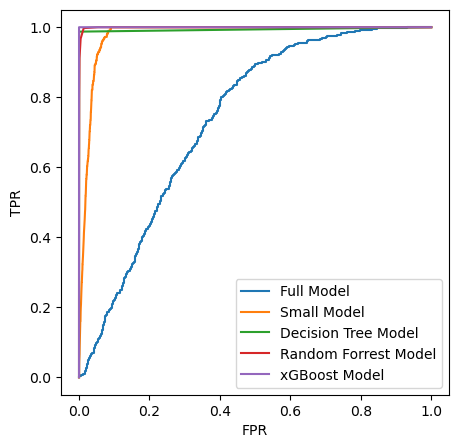

In [50]:
fpr_small, tpr_small, thresholds_small = roc_curve(y_val, y_pred_small)
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr,label='Full Model')
plt.plot(fpr_small, tpr_small,label='Small Model')
plt.plot(fpr_dt, tpr_dt,label='Decision Tree Model')
plt.plot(fpr_rf, tpr_rf,label='Random Forrest Model')
plt.plot(fpr_xg, tpr_xg,label='xGBoost Model')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [69]:
from sklearn.metrics import confusion_matrix
cm_full = confusion_matrix(y_val, y_pred > 0.5)
cm_small = confusion_matrix(y_val, y_pred_small > 0.5)
cm_dt = confusion_matrix(y_val, y_pred_val_dt)
cm_rf = confusion_matrix(y_val, y_pred_val_dt)
cm_xg = confusion_matrix(y_val, y_pred_xg > 0.5)

In [70]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

C:\Users\smesmgmt009\AppData\Local\Temp\ipykernel_16356\1662457526.py:77: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = cf[1,1] / sum(cf[:,1])


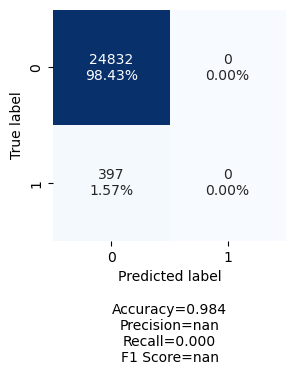

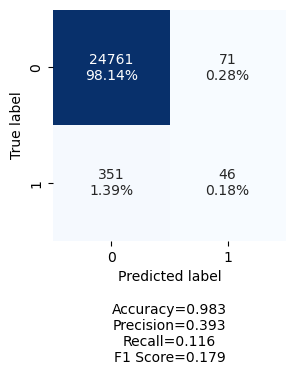

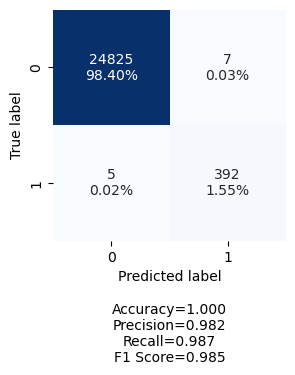

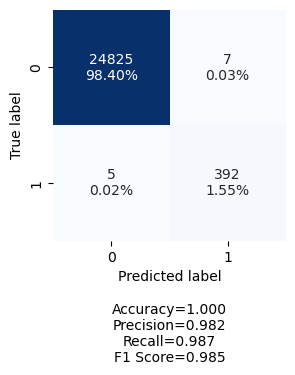

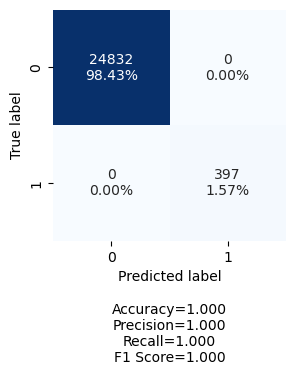

In [74]:
for matrix in [cm_full, cm_small, cm_dt, cm_rf, cm_xg]:
    make_confusion_matrix(matrix, figsize=(3,3), cbar=False)